## Perceptron

environment setting

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

load iris data, no header

In [2]:
df = pd.read_csv( "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None )
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Using only the first 100 column of the dataset
Define output column (y) and input column ( using the first and third feature )

In [3]:
y = df.iloc[ 0:100, 4 ].values # .values returns array
y = np.where( y == "Iris-setosa", -1, 1 ) # ifelse
x = df.iloc[ 0:100, [ 0, 2 ] ].values

Visualize a scatter plot

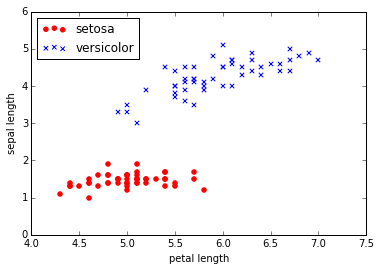

In [4]:
plt.scatter( x[ :50, 0 ], x[ :50, 1 ], color = "red", marker = "o", label = "setosa" )
plt.scatter( x[ 50:, 0 ], x[ 50:, 1 ], color = "blue", marker = "x", label = "versicolor" )
plt.xlabel( "petal length" )
plt.ylabel( "sepal length" )
plt.legend( loc = "upper left" )
plt.show()

Train the perceptron using a fix learning rate and number of iterations

In [5]:
import chapter2 as ch2

In [6]:
ppn = ch2.Perceptron( eta = 0.1, n_iter = 10 )
ppn.fit( x, y )

Visualize the missclassification count. The graph shows that the algorithm already converged after six epochs (iterations).

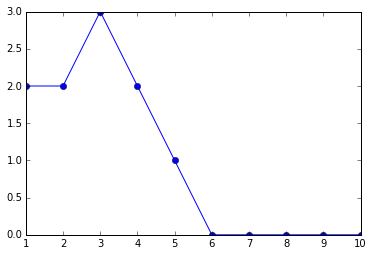

In [7]:
plt.plot( range( 1, len(ppn.errors_) + 1 ), ppn.errors_, marker = "o" )
plt.show()

## Perceptron via Gradient Descent

In [8]:
ada1 = ch2.AdaGrad( eta = 0.01, n_iter = 10 ).fit( x, y )
ada2 = ch2.AdaGrad( eta = 0.0001, n_iter = 10 ).fit( x, y )

Fit the training using two different learning rate. The graph on the left below shows that a learning rate that's too large will *overshoot* the global minimum.

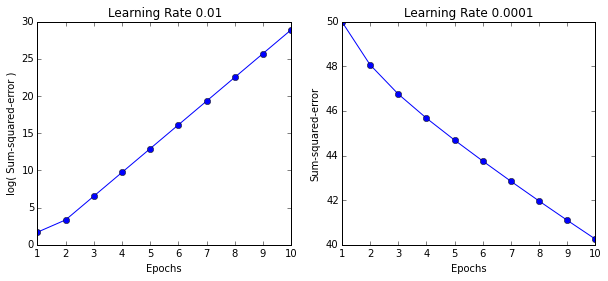

In [9]:
fig, ax = plt.subplots( nrows = 1, ncols = 2, figsize = ( 10, 4 ) )
ax[0].plot( range( 1, len( ada1.costs_ ) + 1 ), np.log10( ada1.costs_ ), marker = "o" )
ax[0].set_xlabel( "Epochs" )
ax[0].set_ylabel( "log( Sum-squared-error )" )
ax[0].set_title( "Learning Rate 0.01" )
ax[1].plot( range( 1, len( ada2.costs_ ) + 1 ), ada2.costs_, marker = "o" )
ax[1].set_xlabel( "Epochs" )
ax[1].set_ylabel( "Sum-squared-error" )
ax[1].set_title( "Learning Rate 0.0001" )
plt.show()

Use feature scaling to check if there will be improvement

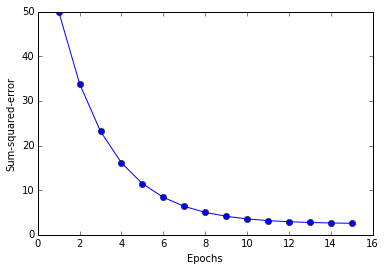

In [10]:
x_std = np.copy(x)
x_std[ :, 0 ] = ( x[ :, 0 ] - x[ :, 0 ].mean() ) / x[ :, 0 ].std()
x_std[ :, 1 ] = ( x[ :, 1 ] - x[ :, 1 ].mean() ) / x[ :, 1 ].std()

# train 
ada = ch2.AdaGrad( n_iter = 15, eta = 0.01 )
ada.fit( x_std, y )

# plot convergence
plt.plot( range( 1, len(ada.costs_) + 1 ), ada.costs_, marker = "o" )
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

Use stochastic gradient descent 

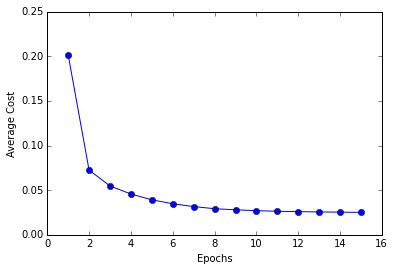

In [11]:
ada_sgd = ch2.AdaSGD( n_iter = 15, eta = 0.01, random_state = 1 )
ada_sgd.fit( x_std, y )

plt.plot( range(1, len(ada_sgd.costs_) + 1), ada_sgd.costs_, marker = "o" )
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()